Questo file è la copia di ValutazioneEmbeddingInfoGRAPH, dove cercavo di valutare gli embedding prodotti solo del layer 3. Ora voglio valutare anche quelli del layer 1 che hanno delle informazioni aggiuntive essendo stati annotati con le clinical entities!

Ho due metodi per valutare embedding layer 1:

1) Valutazione del rank della similarità (prendo un documento, vedo la classifica dei documenti più simili a lui sulla base di InfoGraph e poi sulla base di UMLS, vediamo se le due classifiche sono simili)

2) CLustering sulla matrice di similarità (Faccio clustering sulla matrice di similarità (euclidean distance oppure cosine) frai documenti di Infograph e poi faccio la stessa cosa con la matrice di similarità di UMLS (usando come metrica di similarità quella prodotta da noi con intersezione di CUI broader concepts). Vogliamo vedere se i cluster prodotti sono simili.

In [1]:
import json
import pandas as pd
import time
import os
from tqdm.notebook import tqdm
DIR = "C:/Users/enduser/OneDrive - Politecnico di Milano/Ingegneria matematica/Tesi/ProveDiCodice/E3C-Corpus/data_collection/Italian/layer3"

# Elenco dei file nella directory
data_files = os.listdir(DIR)

In [2]:
dfs = []
for filename in tqdm(os.listdir(DIR)):
    authors_string = False
    authors_dict = False
    f = os.path.join(DIR, filename)
    if os.path.isfile(f):
      with open(f, 'r', encoding='utf-8') as fp: # QUESTA è LA RIGA MODIFICATA, VEDI CODICE ORIGINALE VITTORIO PER CAPIRE, QUESTA MODIFICA è STATA NECESSARIA ALTRIMENTI MI DAVA ERRORE (SU COLLAB NO)
        d = json.load(fp)
      if d['authors'] == []:
        d['authors'] = ''
        i = [0]
      elif isinstance(d['authors'], str): #for some Spanish documents (es ES102568.json)
        authors_string = True
        i = [0]
      elif isinstance(d['authors'], dict): #for Basque
        authors_dict = True
        i = [0]
      else:
        i = list(range(len(d['authors'])))
      data = pd.DataFrame(d, index=i)
      if d['authors'] != '':
        try:
          data.authors = pd.DataFrame(data.authors.values.tolist())['author']
        except: #spanish has different format
          if authors_dict:
            data.authors = d['authors']['author']
          elif not authors_string:
            data.authors = pd.DataFrame(data.authors.values.tolist())[1]
        cols = list(data.columns) # columns are different in different languages
        cols.remove('authors')
        data = data.groupby(cols)['authors'].apply(','.join).reset_index()
      dfs.append(data) # append the data frame to the list
df = pd.concat(dfs, ignore_index=True, axis=0) # concatenate all the data frames in the list.

  0%|          | 0/10213 [00:00<?, ?it/s]

In [10]:
df

,doi,publication_date,id,url,source,source_url,licence,language,type,description,text,authors
0,https://doi.org/10.1177/039493620802001-201,2008-MM-DD,IT102074,https://journals.aboutscience.eu/index.php/gcn...,GCND Giornale di Clinica Nefrologica e Dialisi,https://journals.aboutscience.eu/index.php/gcnd,CC-BY-NC,it,journal,,C.C. iniziava a fare dialisi all’età di 17 ann...,M. Pegoraro
1,https://doi.org/10.1177/039493620802001-201,2008-MM-DD,IT102075,https://journals.aboutscience.eu/index.php/gcn...,GCND Giornale di Clinica Nefrologica e Dialisi,https://journals.aboutscience.eu/index.php/gcnd,CC-BY-NC,it,journal,,I.Z. è un giovane di 22 anni. Pochi giorni pri...,M. Pegoraro
2,https://doi.org/10.1177/039493620802001-201,2008-MM-DD,IT102076,https://journals.aboutscience.eu/index.php/gcn...,GCND Giornale di Clinica Nefrologica e Dialisi,https://journals.aboutscience.eu/index.php/gcnd,CC-BY-NC,it,journal,,Nel giugno 2007 presso la Struttura Complessa ...,F. Cavatorta
3,https://doi.org/10.1177/039493621002200401,2010-MM-DD,IT102077,https://journals.aboutscience.eu/index.php/gcn...,GCND Giornale di Clinica Nefrologica e Dialisi,https://journals.aboutscience.eu/index.php/gcnd,CC-BY-NC,it,journal,,Donna di 75 anni affetta da diabete mellito di...,"C. D’Alessandro,E. Colombini,G. Pasquariello,G..."
4,https://doi.org/10.1177/039493621002200401,2010-MM-DD,IT102078,https://journals.aboutscience.eu/index.php/gcn...,GCND Giornale di Clinica Nefrologica e Dialisi,https://journals.aboutscience.eu/index.php/gcnd,CC-BY-NC,it,journal,,Nel settembre del 2008 giunge alla nostra osse...,"C. Galderisi,A. Cecilia,M. Tomaselli,P. Arcier..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10208,,2021-02-01,IT112282,,Agenzia Italiana del Farmaco,https://farmaci.agenziafarmaco.gov.it,CC-BY-NC,it,other,patient information leaflets for medicines,Confezioni \r\n Zytiga 250 mg 120 compresse\nC...,
10209,,2021-02-01,IT112283,,Agenzia Italiana del Farmaco,https://farmaci.agenziafarmaco.gov.it,CC-BY-NC,it,other,patient information leaflets for medicines,Confezioni \r\n Zytiga 500 mg 56 compresse riv...,
10210,,2021-02-01,IT112284,,Agenzia Italiana del Farmaco,https://farmaci.agenziafarmaco.gov.it,CC-BY-NC,it,other,patient information leaflets for medicines,Confezioni \r\n Zyvoxid 600 mg 10 compresse ri...,
10211,,2021-02-01,IT112285,,Agenzia Italiana del Farmaco,https://farmaci.agenziafarmaco.gov.it,CC-BY-NC,it,other,patient information leaflets for medicines,Confezioni \r\n Zyvoxid 1 flacone di granulato...,


In [11]:
DIR = "C:/Users/enduser/OneDrive - Politecnico di Milano/Ingegneria matematica/Tesi/ProveDiCodice/E3C-Corpus/data_collection/Italian/layer1"

# Elenco dei file nella directory
data_files = os.listdir(DIR)

In [4]:
dfs = []
for filename in tqdm(os.listdir(DIR)):
    authors_string = False
    authors_dict = False
    f = os.path.join(DIR, filename)
    if os.path.isfile(f):
      with open(f, 'r', encoding='utf-8') as fp: # QUESTA è LA RIGA MODIFICATA, VEDI CODICE ORIGINALE VITTORIO PER CAPIRE, QUESTA MODIFICA è STATA NECESSARIA ALTRIMENTI MI DAVA ERRORE (SU COLLAB NO)
        d = json.load(fp)
      if d['authors'] == []:
        d['authors'] = ''
        i = [0]
      elif isinstance(d['authors'], str): #for some Spanish documents (es ES102568.json)
        authors_string = True
        i = [0]
      elif isinstance(d['authors'], dict): #for Basque
        authors_dict = True
        i = [0]
      else:
        i = list(range(len(d['authors'])))
      data = pd.DataFrame(d, index=i)
      if d['authors'] != '':
        try:
          data.authors = pd.DataFrame(data.authors.values.tolist())['author']
        except: #spanish has different format
          if authors_dict:
            data.authors = d['authors']['author']
          elif not authors_string:
            data.authors = pd.DataFrame(data.authors.values.tolist())[1]
        cols = list(data.columns) # columns are different in different languages
        cols.remove('authors')
        data = data.groupby(cols)['authors'].apply(','.join).reset_index()
      dfs.append(data) # append the data frame to the list
df1 = pd.concat(dfs, ignore_index=True, axis=0) # concatenate all the data frames in the list.

  0%|          | 0/86 [00:00<?, ?it/s]

In [5]:
import pickle
from sklearn.cluster import KMeans
import numpy as np

In [6]:
with open('EmbeddingLayer3_InfoGraph.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb3 = pickle.load(file)

In [7]:
'''
with open('EmbeddingLayer1InfoGraphINDUCTIVE.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb1 = pickle.load(file)
len(emb1)
# NB: per emb 1 ho degli errori visto che mi esce che ha lunghezza 10213 e non 86!
'''

In [23]:
with open('EmbeddingLayer1and3_InfoGraphTRANSDUCTIVE.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb1and3 = pickle.load(file)

In [24]:
emb1and3 = np.delete(emb1and3, 38, axis=0)  # devo rimuovere il documento sofa 4178(IT100830.xml) (il 39esimo della cartella)
emb1and3 = np.delete(emb1and3, 85, axis=0) # e 9056 l'ultimo file ovvero IT102068.xml)

#siccome questi due file non contengono clinical entities!

Osservo che emb1 and 3 non è ottenuto concatenando embedding 1 e 3, ma rirunnando infograph in setting tranductive, quindi non avviene che emb1and3[86]==emb3[0]!

In [28]:
len(emb3)

10213

la dimensione di ciascun vettore è 96 (3 gnn layers che producono vettori dim 32 che concatenandosi 3 volte arrivano a 96)

# LAVORIAMO SU LAYER 3 

In [31]:
emb = emb3

# Primi 100 embeddings layer 3

In [32]:
# Andiamo ad analizzare i primi 100 embedding per poterci lavorare più agilmente:

emb100 = emb[0:100]

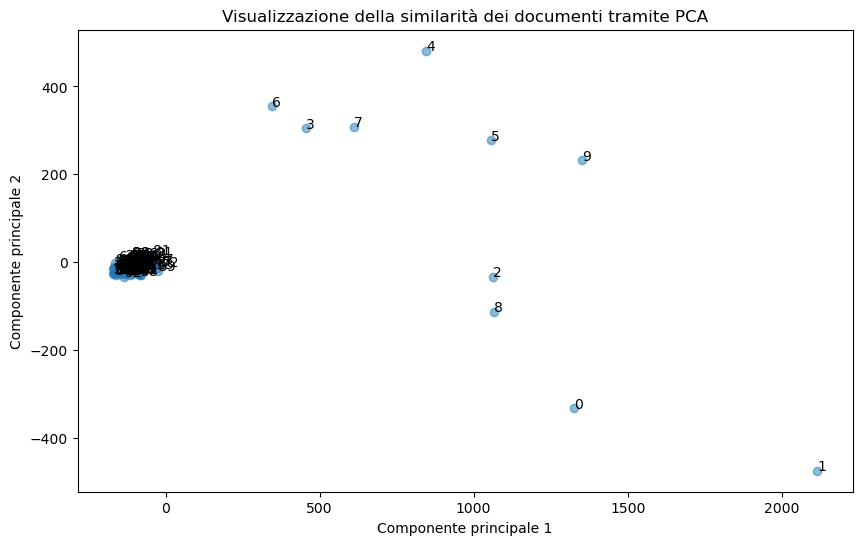

In [33]:
document_vectors = emb100
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = pca.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

Notiamo che i documenti dallo 0 al 9 sono molto diversi dagli altri!

Da una rapida analisi vediamo subito che il fattore comune dei primi 10 testi è che sono molto più lunghi degli altri 90, un'osservazione sensata potrebbe essere quella di rimuovere i testi troppo brevi perchè forniscono poche informazioni essendo poco particolareggiati.

In [34]:
explained_variance_ratio = pca.explained_variance_ratio_

print("Percentuale di varianza spiegata da ciascuna componente principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio*100:.2f}%")

Percentuale di varianza spiegata da ciascuna componente principale:
PC1: 89.16%
PC2: 6.62%


In [35]:
weights = pca.components_

print("Pesi della prima componente principale:")
#print(weights)

Pesi della prima componente principale:


In [36]:
# Similarità dei documenti:

document_similarity = np.dot(document_vectors, document_vectors.T)
document_lengths = np.linalg.norm(document_vectors, axis=1)  # Lunghezza di ciascun vettore

# Normalizzazione dei valori di similarità
document_similarity_normalized = document_similarity / np.outer(document_lengths, document_lengths)

'''
#il codice sopra per calcolare la similarità trai documenti, è analogo a:

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(document_vectors)

'''

'\n#il codice sopra per calcolare la similarità trai documenti, è analogo a:\n\nfrom sklearn.metrics.pairwise import cosine_similarity\nsimilarity_matrix = cosine_similarity(document_vectors)\n\n'

In [37]:
#document_similarity_normalized[0] # document_similarity è una matrice quadrata 100*100 dove in posizione i,j si rappresenta 
#la similarità tra il documento i e j

ORA FACCIO CLUSTERING!

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(document_vectors)
similarity_matrix[0]

array([1.0000002 , 0.9879471 , 0.9623245 , 0.7467973 , 0.75230867,
       0.88993645, 0.6380896 , 0.7865736 , 0.9640758 , 0.91764206,
       0.853283  , 0.7479473 , 0.48606467, 0.83044636, 0.24856156,
       0.70253265, 0.6203547 , 0.716124  , 0.7589245 , 0.35261053,
       0.6184229 , 0.8701389 , 0.8381156 , 0.6491408 , 0.8047879 ,
       0.7541163 , 0.7044475 , 0.6774998 , 0.82560116, 0.7224013 ,
       0.7635825 , 0.6418735 , 0.8202248 , 0.76872426, 0.8049919 ,
       0.27109703, 0.8250395 , 0.83335024, 0.8689082 , 0.8023243 ,
       0.83972335, 0.7959477 , 0.72488827, 0.8871471 , 0.35466126,
       0.85281   , 0.7992539 , 0.89506996, 0.7886843 , 0.84281516,
       0.82947594, 0.8645336 , 0.724024  , 0.85247314, 0.7991212 ,
       0.8328032 , 0.8418548 , 0.8628687 , 0.7284288 , 0.5272231 ,
       0.70408314, 0.60497284, 0.81689334, 0.63255394, 0.37729943,
       0.79627633, 0.92073745, 0.82132643, 0.63662136, 0.7406252 ,
       0.7421568 , 0.53278196, 0.87149954, 0.57068336, 0.56202

In [45]:
from sklearn.cluster import KMeans
import numpy as np

# Supponiamo che tu abbia una matrice numpy chiamata "data_matrix"
# Emb potrebbe essere il tuo array numpy contenente gli array

# Definisci il modello K-means
n_clusters = 5  # Numero di cluster desiderato
n_init = 10  # Numero di volte che l'algoritmo viene eseguito con diverse inizializzazioni casuali dei centroidi
max_iter = 300  # Numero massimo di iterazioni per ciascuna esecuzione
kmeans_model = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)

# Adatta il modello ai dati
kmeans_model.fit(emb)

# Etichette dei cluster
cluster_labels = kmeans_model.labels_

# Centroidi dei cluster
centroids = kmeans_model.cluster_centers_

# Visualizza i risultati
print("Etichette dei cluster:", cluster_labels)
#print("Centroidi dei cluster:", centroids)

Etichette dei cluster: [0 0 0 ... 4 4 1]


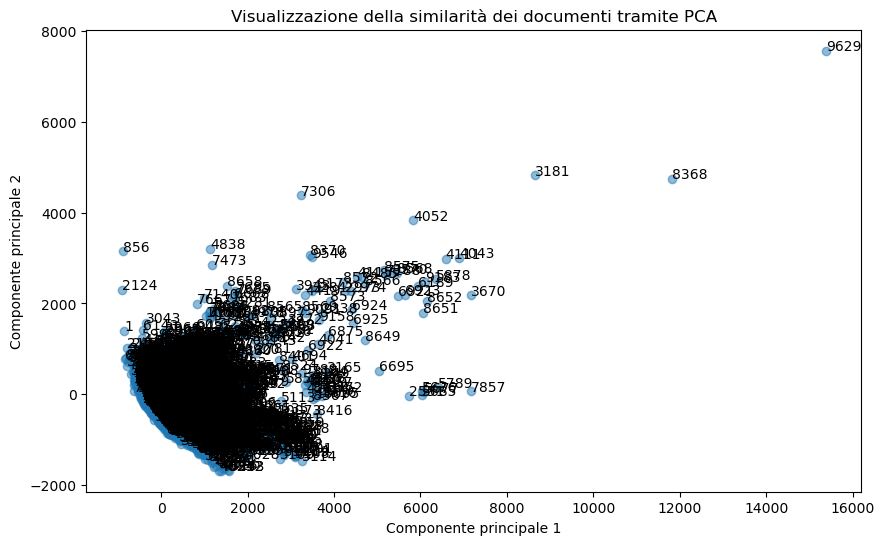

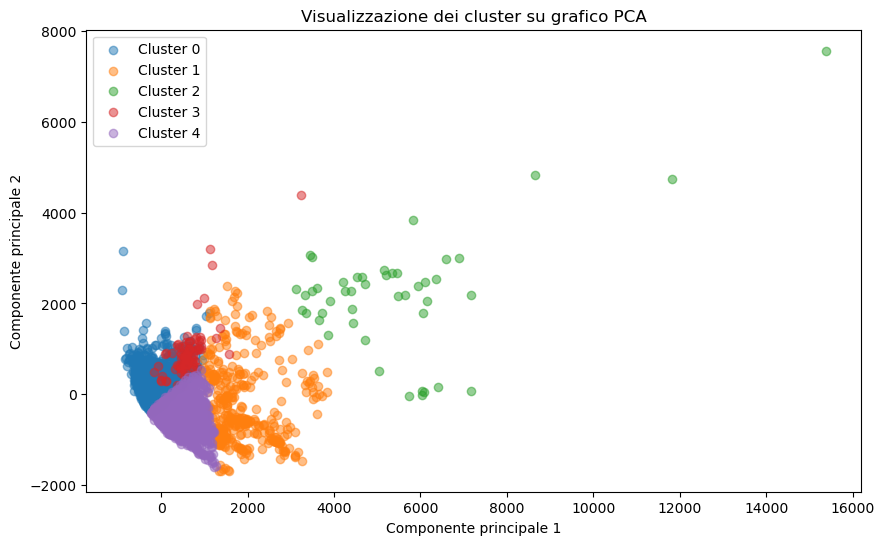

In [46]:
document_vectors = emb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = pca.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding[cluster_labels == label, 0], document_embedding[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.legend()
plt.show()

Carico il dataset di layer 3 (con il testo e cerco di capire se ha senso) (cosi ho il modo di vedere quale testo sia associato con quale indice del dataset), 
e cerco di capire se questi risultati sono sensati (ad esempio 9629 e 8368), sono distanti da tutti i testi e vicini fra loro,
vediamo se le anamnesi sono effetivamente simili.

Risposta SI'! Vedi sotto: infatti tutti i documenti che si trovano in alto a destra nel PCA sono corrispondenti a 
spiegazioni farmcologiche provenienti da Agenzia Italiana del Farmaco!!

In [47]:
df.loc[9629]

doi                                                                  
publication_date                                           2021-02-01
id                                                           IT111703
url                                                                  
source                                   Agenzia Italiana del Farmaco
source_url                      https://farmaci.agenziafarmaco.gov.it
licence                                                      CC-BY-NC
language                                                           it
type                                                            other
description                patient information leaflets for medicines
text                Confezioni \r\n Ultiva ev 5 flaconi 2 mg (conf...
authors                                                              
Name: 9629, dtype: object

In [48]:
df.loc[8368]

doi                                                                  
publication_date                                           2021-02-01
id                                                           IT110442
url                                                                  
source                                   Agenzia Italiana del Farmaco
source_url                      https://farmaci.agenziafarmaco.gov.it
licence                                                      CC-BY-NC
language                                                           it
type                                                            other
description                patient information leaflets for medicines
text                Confezioni \r\n Remifentanil Mylan Generics 1 ...
authors                                                              
Name: 8368, dtype: object

In [49]:
explained_variance_ratio = pca.explained_variance_ratio_

print("Percentuale di varianza spiegata da ciascuna componente principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio*100:.2f}%")

Percentuale di varianza spiegata da ciascuna componente principale:
PC1: 46.38%
PC2: 19.89%


In [50]:
weights = pca.components_

print("Pesi della prima componente principale:")
#print(weights)

Pesi della prima componente principale:


Osservo una cosa interessante: la prima componente principale spiega quasi tutta la variabilità!!!

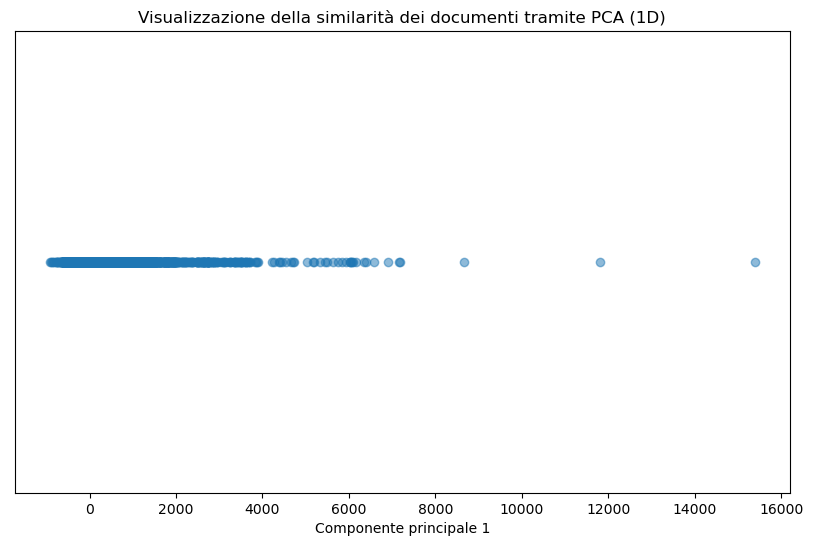

In [51]:
pca = PCA(n_components=1)
document_embedding = pca.fit_transform(document_vectors)

# Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding, np.zeros_like(document_embedding), alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA (1D)')
plt.xlabel('Componente principale 1')
plt.yticks([])  # Rimuovi le etichette sull'asse y
plt.show()

Facciamo TSNE invece che PCA per la valutazione (esperimento)

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


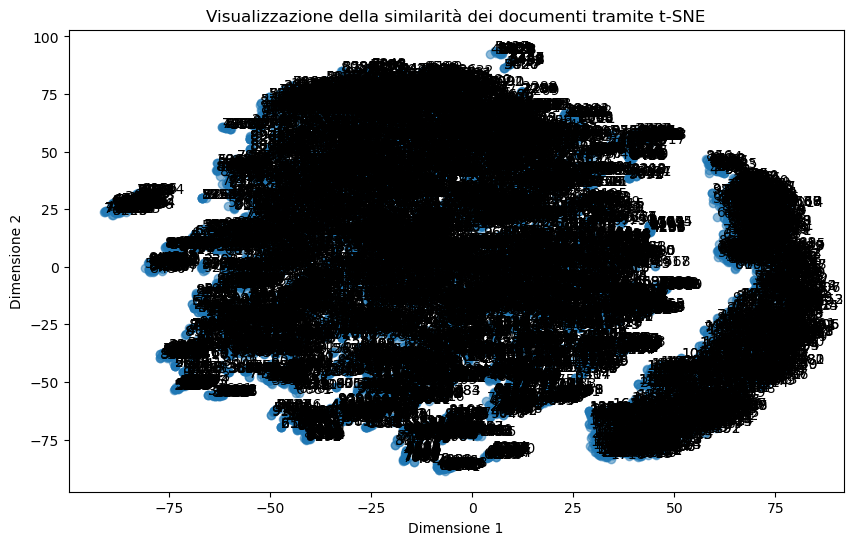

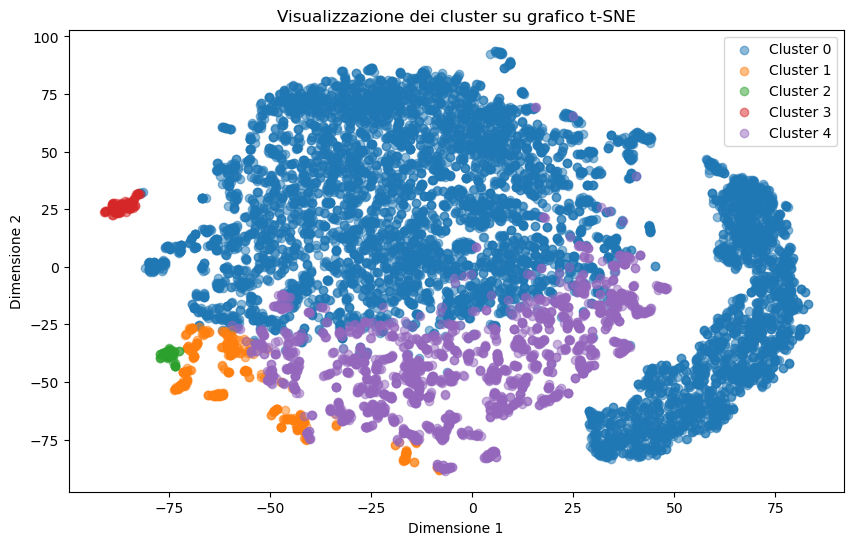

In [52]:
from sklearn.manifold import TSNE

# 2. Applica t-SNE per ridurre le dimensioni
tsne = TSNE(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = tsne.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding[cluster_labels == label, 0], document_embedding[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')
plt.legend()
plt.show()

In [53]:
from collections import defaultdict

# Crea un dizionario per mappare gli indici dei documenti ai rispettivi cluster
documenti_per_cluster = defaultdict(list)
for indice_documento, etichetta_cluster in enumerate(cluster_labels):
    documenti_per_cluster[etichetta_cluster].append(indice_documento)

# Stampa i documenti per ciascun cluster
for cluster, documenti in documenti_per_cluster.items():
    print(f"Cluster {cluster}:")
    for doc_index in documenti:
        print(f"Documento {doc_index}")

Cluster 0:
Documento 0
Documento 1
Documento 2
Documento 3
Documento 4
Documento 5
Documento 6
Documento 7
Documento 8
Documento 9
Documento 10
Documento 11
Documento 12
Documento 13
Documento 14
Documento 15
Documento 16
Documento 17
Documento 18
Documento 19
Documento 20
Documento 21
Documento 22
Documento 23
Documento 24
Documento 25
Documento 26
Documento 27
Documento 28
Documento 29
Documento 30
Documento 31
Documento 32
Documento 33
Documento 34
Documento 35
Documento 36
Documento 37
Documento 38
Documento 39
Documento 40
Documento 41
Documento 42
Documento 43
Documento 44
Documento 45
Documento 46
Documento 47
Documento 48
Documento 49
Documento 50
Documento 51
Documento 52
Documento 53
Documento 54
Documento 55
Documento 56
Documento 57
Documento 58
Documento 59
Documento 60
Documento 61
Documento 62
Documento 63
Documento 64
Documento 65
Documento 66
Documento 67
Documento 68
Documento 69
Documento 70
Documento 71
Documento 72
Documento 73
Documento 74
Documento 75
Documento 7

Altra modifica: utilizziamo HDBSCAN invece che k-means per fare clustering! er farlo modifico un po' i valori di epsilon, gammma ecc!

In [54]:
from sklearn.cluster import DBSCAN

# Definisci il modello DBSCAN
eps = 10  # Distanza massima tra due campioni per essere considerati nello stesso vicinato
min_samples = 10  # Numero minimo di campioni necessari in un vicinato per essere considerati come nucleo
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)

# Adatta il modello ai dati
clusterer = dbscan_model.fit(emb)

# Etichette dei cluster
cluster_labels = clusterer.labels_

# Visualizza i risultati
print("Etichette dei cluster:", cluster_labels)

Etichette dei cluster: [-1 -1 -1 ... -1 -1 -1]


In [55]:
set(cluster_labels)

{-1, 0, 1}

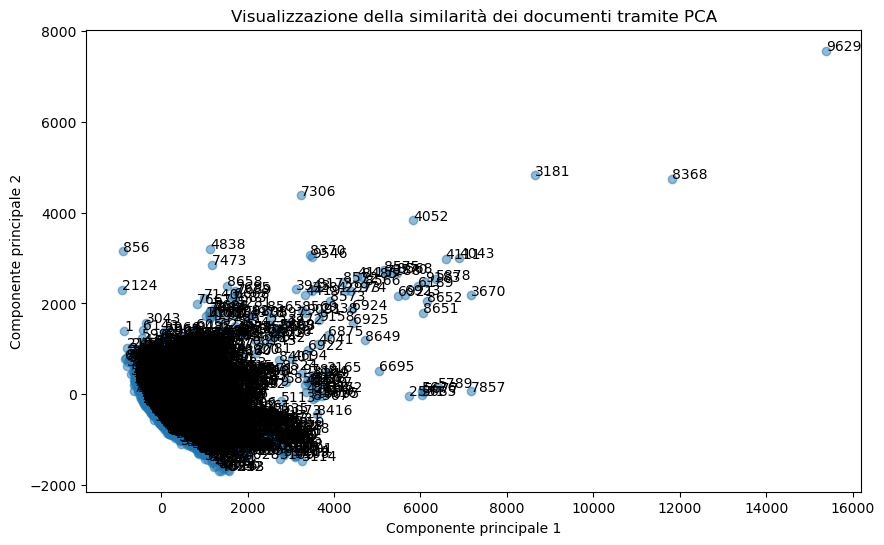

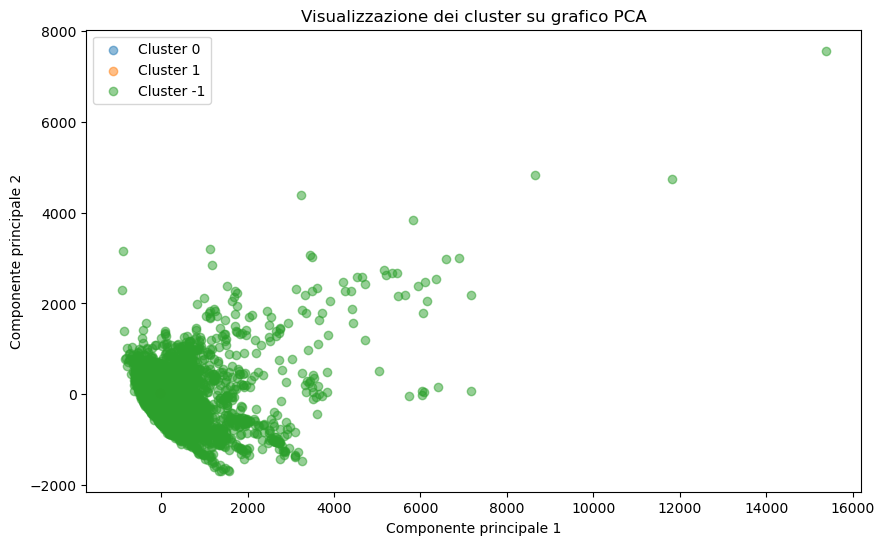

In [56]:
document_vectors = emb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = pca.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding[cluster_labels == label, 0], document_embedding[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.legend()
plt.show()

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


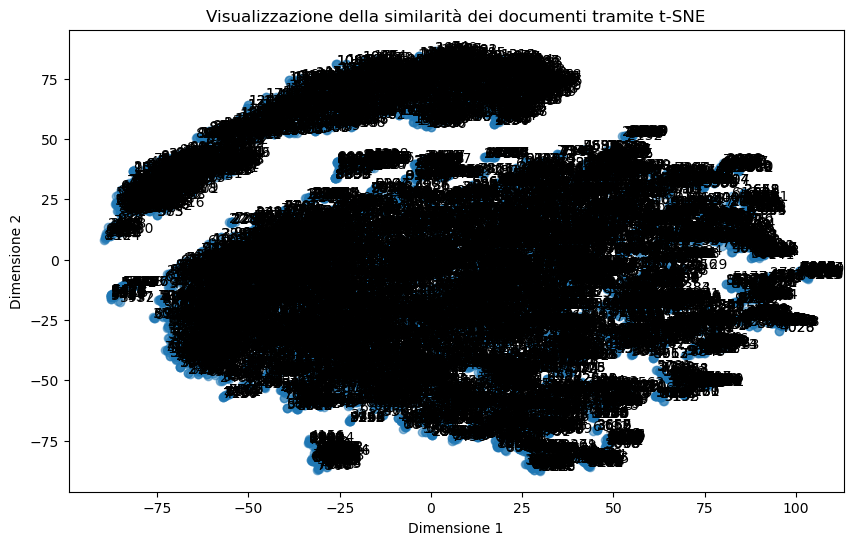

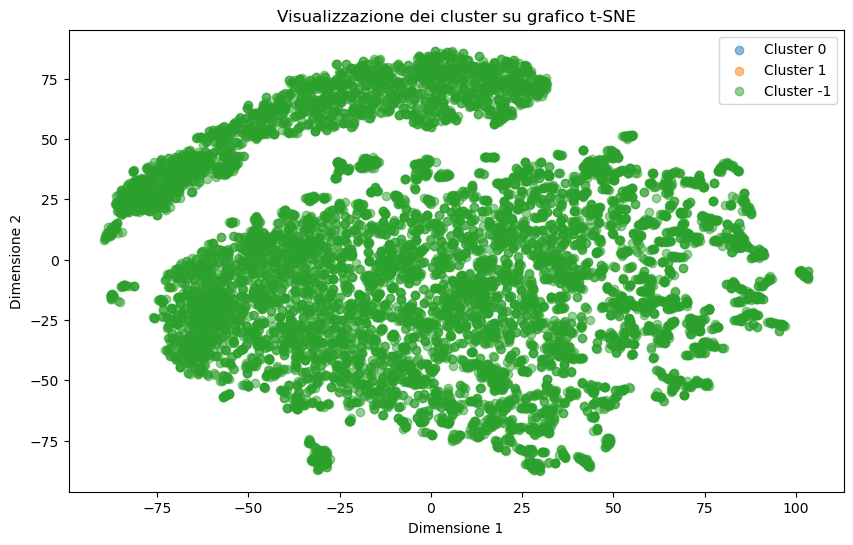

In [57]:
from sklearn.manifold import TSNE

# 2. Applica t-SNE per ridurre le dimensioni
tsne = TSNE(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = tsne.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding[cluster_labels == label, 0], document_embedding[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')
plt.legend()
plt.show()

Osservo che DBSCAN non va bene perchè mi assegna quasi tutti i valori a -1 (ovvero valore di rumore)

# LAVORIAMO SU LAYER 1 E LAYER 3 (FOCUS SU LAYER 1)

LAYER 1

In [58]:
emb1TRAN = emb1and3[0:84] # seleziono i primi 86 documenti, ovvero quelli relativi a layer 1
emb = emb1TRAN

Etichette dei cluster: [0 2 0 0 2 1 1 0 0 2 2 0 2 2 2 0 1 2 1 2 1 1 0 1 2 1 2 1 2 1 1 2 2 1 1 1 2
 1 1 2 2 2 2 1 2 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 2
 0 0 2 0 0 0 1 1 0 0]


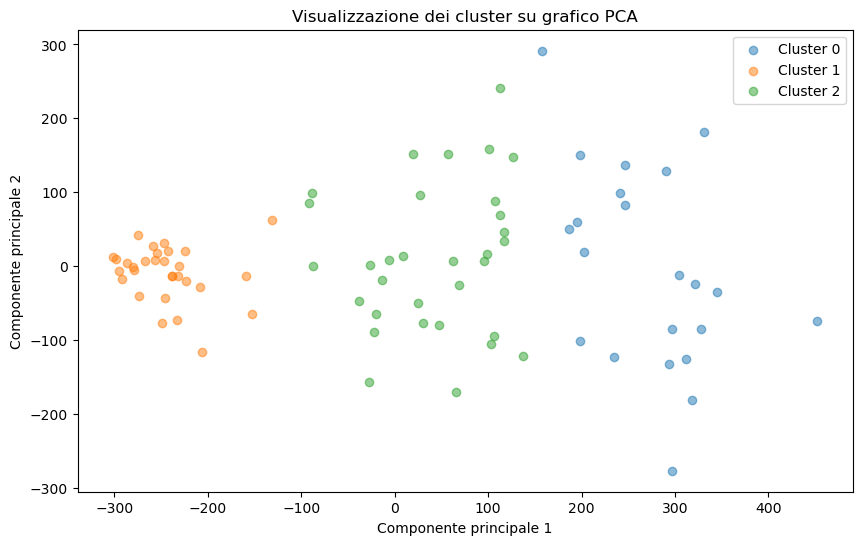

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


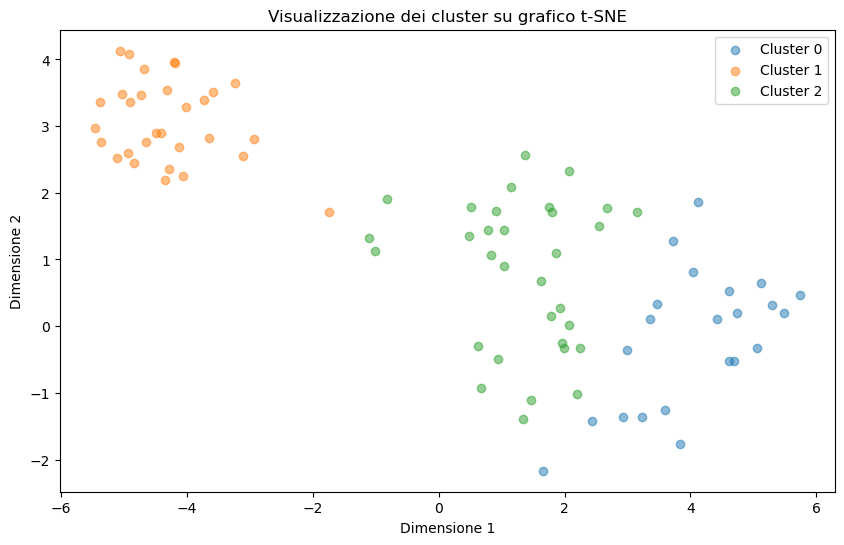

In [60]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Definisci il modello K-means
n_clusters = 3  # Numero di cluster desiderato
n_init = 10  # Numero di volte che l'algoritmo viene eseguito con diverse inizializzazioni casuali dei centroidi
max_iter = 300  # Numero massimo di iterazioni per ciascuna esecuzione
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)

# Adatta il modello ai dati
kmeans.fit(emb)

# Etichette dei cluster
cluster_labels = kmeans.labels_

# Centroidi dei cluster
centroids = kmeans.cluster_centers_

# Visualizza i risultati
print("Etichette dei cluster:", cluster_labels)

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding_pca = pca.fit_transform(emb)

# 3. Visualizza i risultati PCA
plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding_pca[cluster_labels == label, 0], document_embedding_pca[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.legend()
plt.show()

# 2. Applica t-SNE per ridurre le dimensioni
tsne = TSNE(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding_tsne = tsne.fit_transform(emb)

# 3. Visualizza i risultati t-SNE
plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding_tsne[cluster_labels == label, 0], document_embedding_tsne[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')
plt.legend()
plt.show()

LAYER 1 E 3 ASSIEME

In [61]:
emb = emb1and3

Etichette dei cluster: [0 0 0 ... 0 0 0]


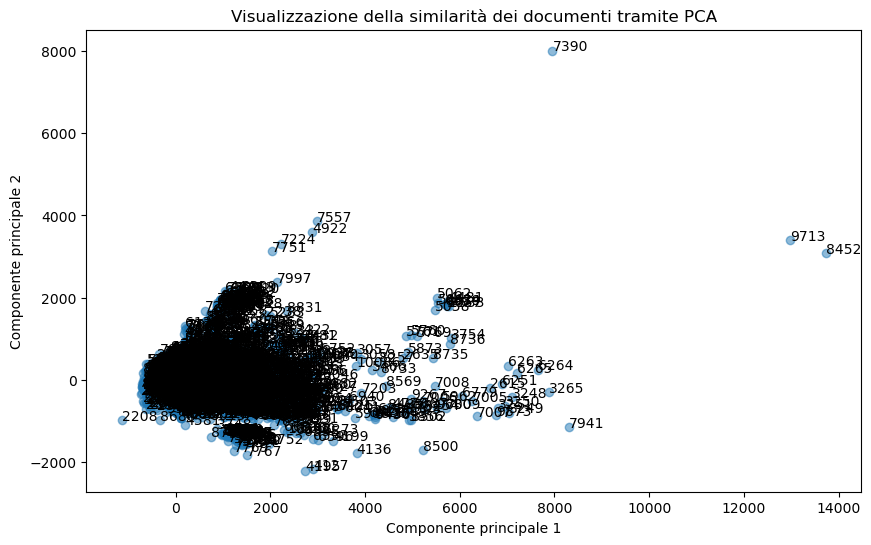

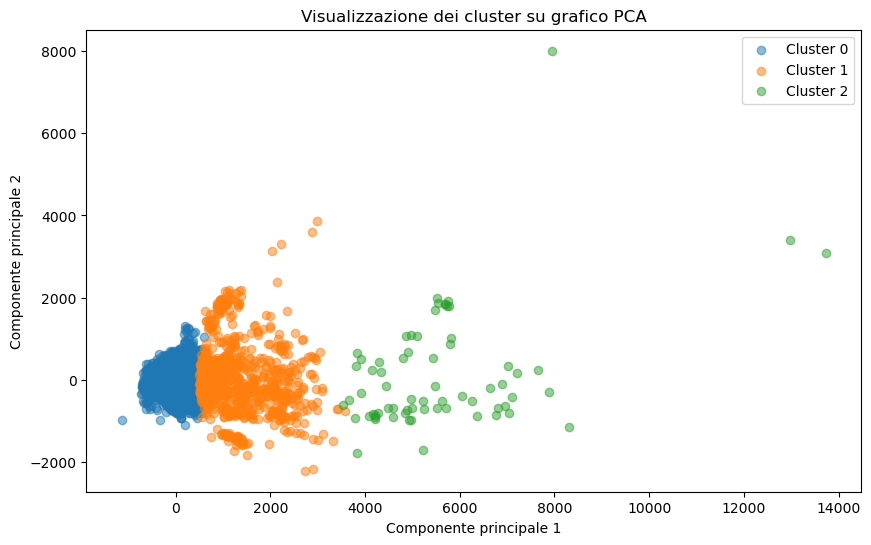

Percentuale di varianza spiegata da ciascuna componente principale:
PC1: 56.40%
PC2: 11.56%
Pesi della prima componente principale:


C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


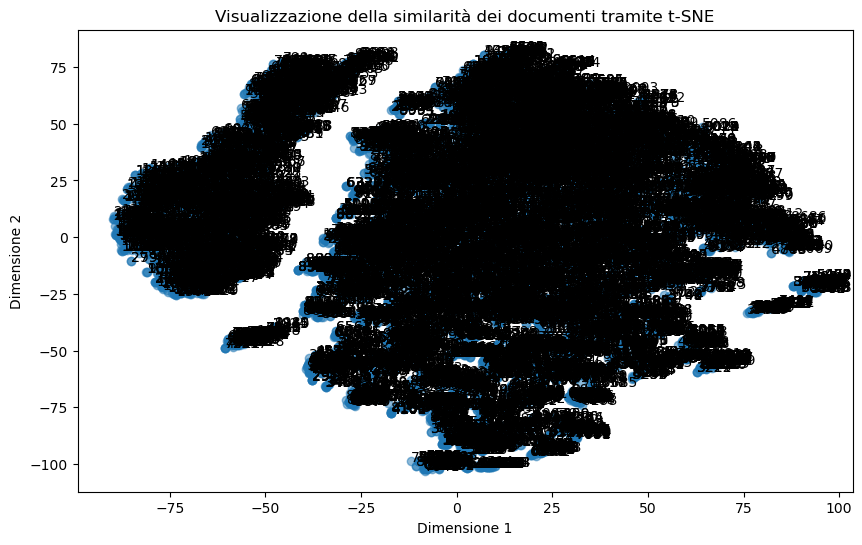

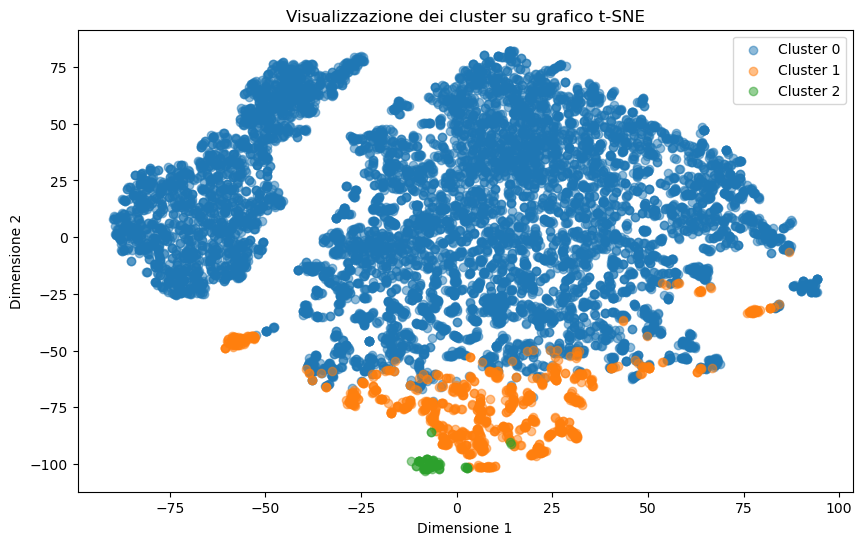

In [62]:
from sklearn.cluster import KMeans
import numpy as np

# Supponiamo che tu abbia una matrice numpy chiamata "data_matrix"

# Definisci il modello K-means
n_clusters = 3  # Numero di cluster desiderato
n_init = 10  # Numero di volte che l'algoritmo viene eseguito con diverse inizializzazioni casuali dei centroidi
max_iter = 300  # Numero massimo di iterazioni per ciascuna esecuzione
kmeans_model = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)
# Adatta il modello ai dati
kmeans.fit(emb)

# Etichette dei cluster
cluster_labels = kmeans.labels_

# Centroidi dei cluster
centroids = kmeans.cluster_centers_

# Visualizza i risultati
print("Etichette dei cluster:", cluster_labels)
#print("Centroidi dei cluster:", centroids)

document_vectors = emb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = pca.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding[cluster_labels == label, 0], document_embedding[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.legend()
plt.show()


explained_variance_ratio = pca.explained_variance_ratio_

print("Percentuale di varianza spiegata da ciascuna componente principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio*100:.2f}%")
    
weights = pca.components_

print("Pesi della prima componente principale:")
#print(weights)

from sklearn.manifold import TSNE

# 2. Applica t-SNE per ridurre le dimensioni
tsne = TSNE(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = tsne.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding[cluster_labels == label, 0], document_embedding[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')
plt.legend()
plt.show()

In [63]:
colori = ['red' if i < 84 else 'blue' for i in range(len(document_vectors))]


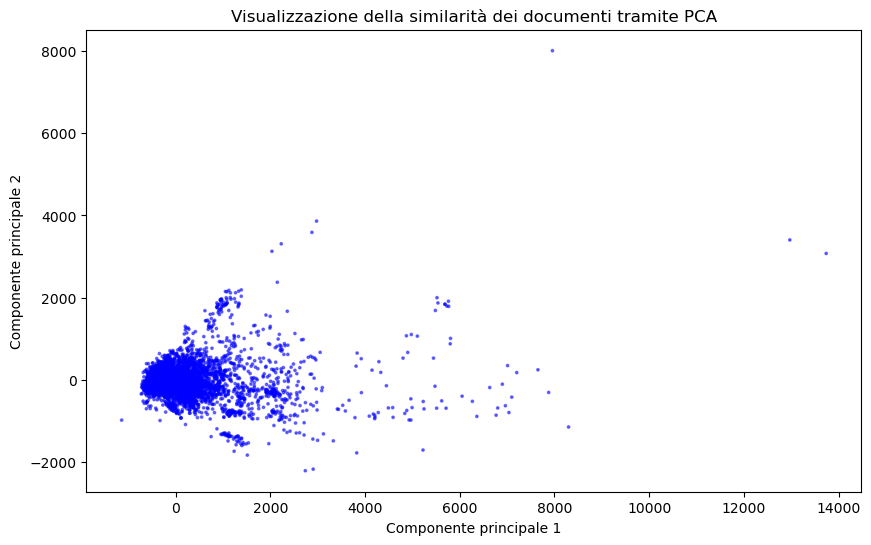

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


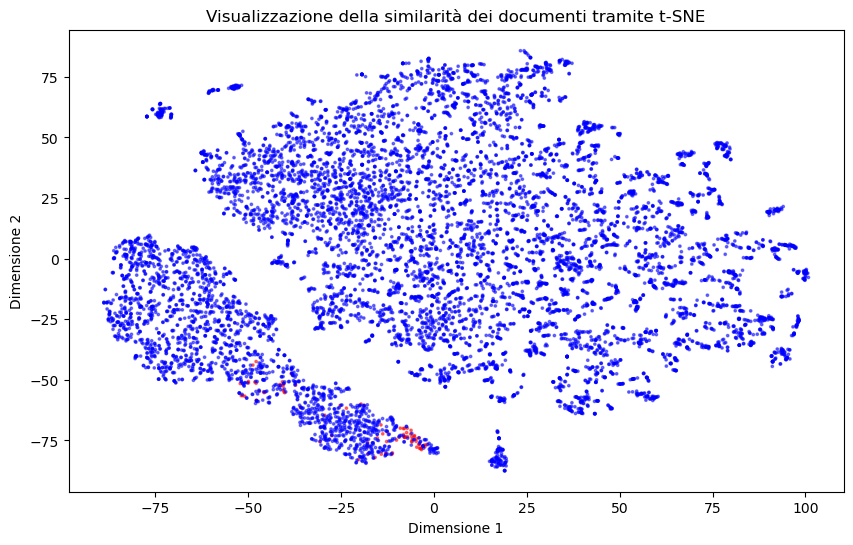

In [64]:
# Plottiamo su pca e tsne layer 1 e layer 3 per vedere se ci sono differenze di embedding!


pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = pca.fit_transform(document_vectors)


plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1],c=colori, alpha=0.5, s = 3)
plt.title('Visualizzazione della similarità dei documenti tramite PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.show()


from sklearn.manifold import TSNE

# 2. Applica t-SNE per ridurre le dimensioni
tsne = TSNE(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = tsne.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1],c = colori, alpha=0.5, s = 3)
plt.title('Visualizzazione della similarità dei documenti tramite t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')

plt.show()

# Vedo clustering e rank-based methods del layer 1
Che confronterò con il groundtruth dato da SimilaritaDocs_intersection_clinicalEntities (cartella UMLS)

La prima cosa da fare per poter comparare i due metodi è creare una matrice di similarità dei documenti, il primo approccio che utilizzero sarà la cosine similiarity frai vettori!

In [65]:
emb1TRAN = emb1and3[0:84] # seleziono i primi 84 documenti, ovvero quelli relativi a layer 1
emb = emb1TRAN

In [71]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcola la matrice di similarità coseno
similarity_matrix = cosine_similarity(emb1TRAN) # calcolo matrice di similarità documenti

print(len(similarity_matrix))

84


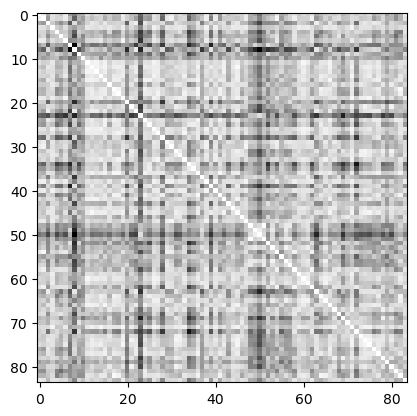

In [72]:
import matplotlib.pyplot as plt

plt.imshow(similarity_matrix, cmap='gray')
plt.show()

In [75]:
is_symmetric = np.allclose(similarity_matrix, similarity_matrix.T)
is_symmetric # ovviamente la matrice di similarità è simmetrica

True

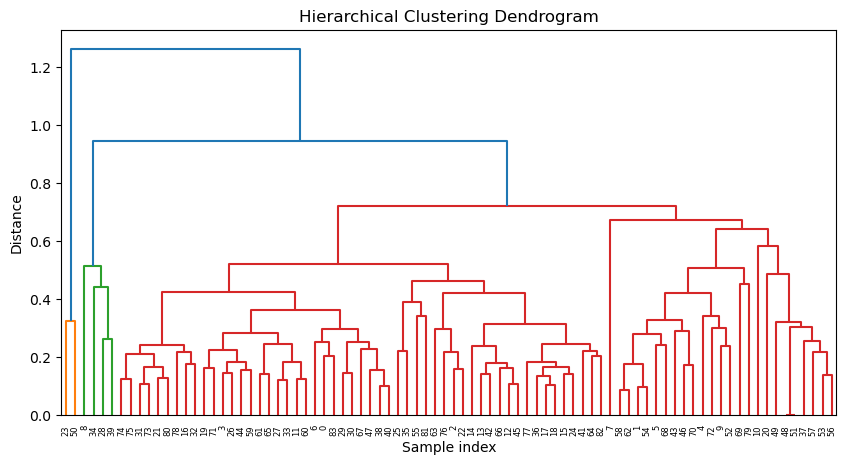

In [87]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calcola i collegamenti gerarchici basati sulla matrice di similarità
Z = linkage(similarity_matrix, method='average') # complete linkage mi sembra il migliore

# Plotta il dendrogramma per visualizzare la gerarchia dei cluster
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [92]:
from scipy.cluster.hierarchy import fcluster

# Determina i cluster tagliando il dendrogramma ad una certa altezza
max_d = 0.7  # Altezza di taglio del dendrogramma
clustersHierarchical = fcluster(Z, max_d, criterion='distance')-1

# Stampa il numero di cluster e le etichette dei cluster
num_clusters = len(set(clustersHierarchical))
print(f"Numero di cluster: {num_clusters}")
print("Etichette dei cluster:", clustersHierarchical)

Numero di cluster: 4
Etichette dei cluster: [2 3 2 2 3 3 2 3 1 3 3 2 2 2 2 2 2 2 2 2 3 2 2 0 2 2 2 2 1 2 2 2 2 2 1 2 2
 3 2 1 2 2 2 3 2 2 3 2 3 3 0 3 3 3 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 3 3 2 3 2
 2 2 2 2 2 3 2 2 2 2]


Numero di cluster: 4
Etichette dei cluster: [2 3 2 2 3 3 2 3 1 3 3 2 2 2 2 2 2 2 2 2 3 2 2 0 2 2 2 2 1 2 2 2 2 2 1 2 2
 3 2 1 2 2 2 3 2 2 3 2 3 3 0 3 3 3 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 3 3 2 3 2
 2 2 2 2 2 3 2 2 2 2]


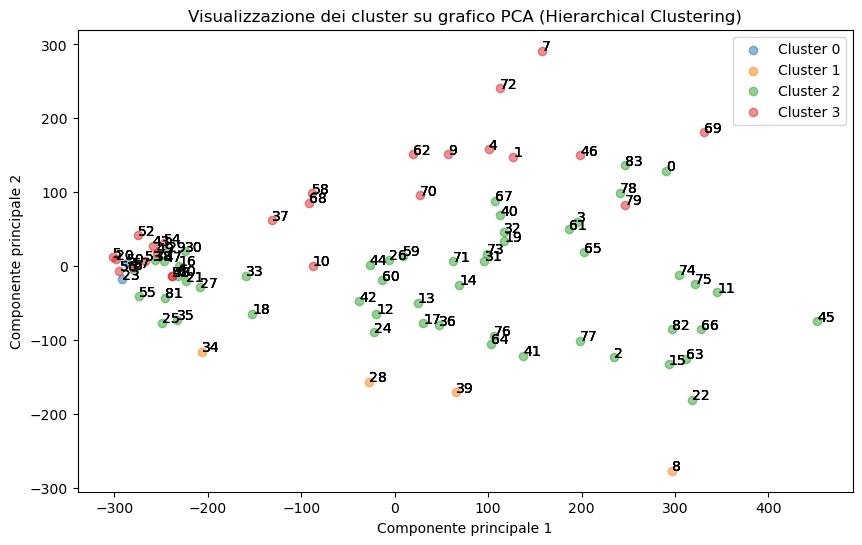

In [95]:
from scipy.cluster.hierarchy import fcluster

# Determina i cluster tagliando il dendrogramma ad una certa altezza
max_d = 0.7  # Altezza di taglio del dendrogramma
clusters_hierarchical = fcluster(Z, max_d, criterion='distance') - 1  # Sottrai 1 per far iniziare gli indici dei cluster da 0

# Stampa il numero di cluster e le etichette dei cluster
num_clusters = len(set(clusters_hierarchical))
print(f"Numero di cluster: {num_clusters}")
print("Etichette dei cluster:", clusters_hierarchical)

# Visualizza i risultati PCA
plt.figure(figsize=(10, 6))
for label in set(clusters_hierarchical):
    plt.scatter(document_embedding_pca[clusters_hierarchical == label, 0], document_embedding_pca[clusters_hierarchical == label, 1], label=f'Cluster {label}', alpha=0.5)
    for i, txt in enumerate(range(len(emb))):
        plt.annotate(txt, (document_embedding_pca[i, 0], document_embedding_pca[i, 1]))

plt.title('Visualizzazione dei cluster su grafico PCA (Hierarchical Clustering)')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.legend()
plt.show()

In [ ]:
# i cluster di infograph sembrano bellini!

Etichette dei cluster: [1 2 1 1 2 0 0 1 1 2 2 1 2 2 2 1 0 2 0 2 0 0 1 0 2 0 2 0 2 0 0 2 2 0 0 0 2
 0 0 2 2 1 2 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 1 2 2 1 2 2 2 2
 1 1 2 1 1 1 0 0 1 1]


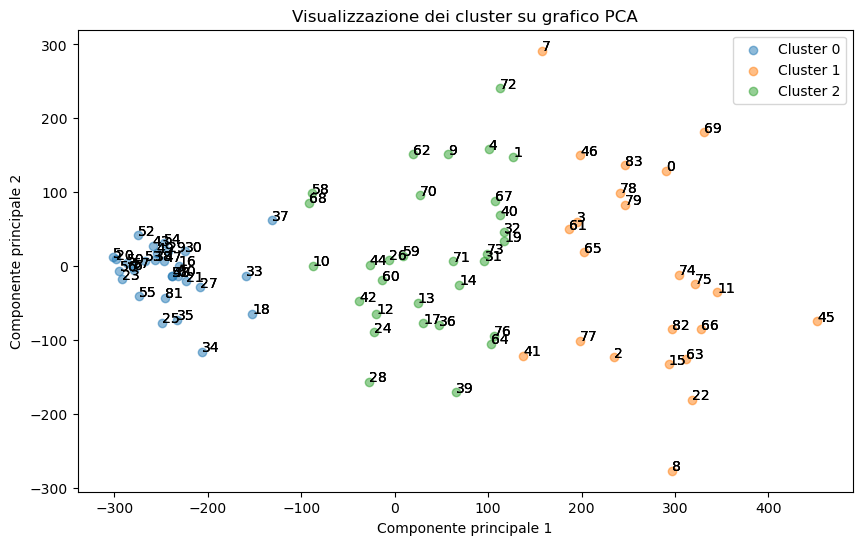

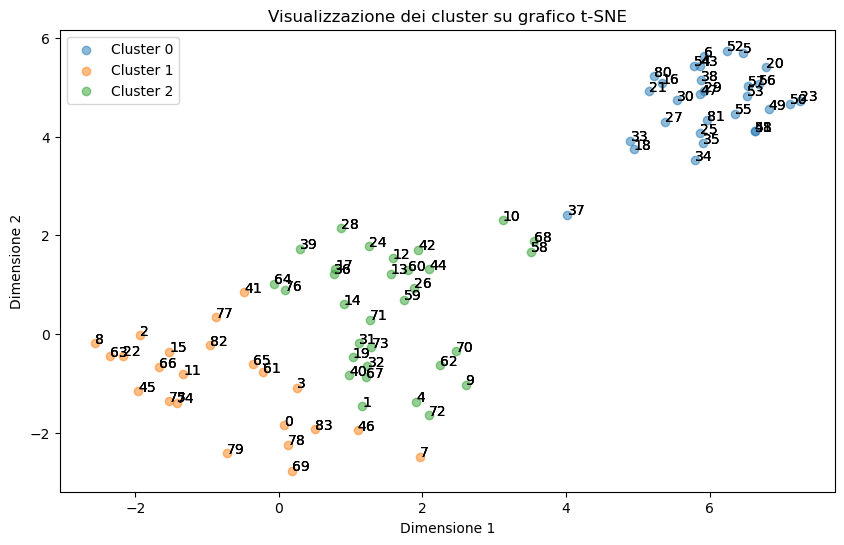

In [83]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Definisci il modello K-means
n_clusters = 3  # Numero di cluster desiderato
n_init = 10  # Numero di volte che l'algoritmo viene eseguito con diverse inizializzazioni casuali dei centroidi
max_iter = 300  # Numero massimo di iterazioni per ciascuna esecuzione
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)

# Adatta il modello ai dati
kmeans.fit(emb)

# Etichette dei cluster
cluster_labels = kmeans.labels_

# Centroidi dei cluster
centroids = kmeans.cluster_centers_

# Visualizza i risultati
print("Etichette dei cluster:", cluster_labels)

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding_pca = pca.fit_transform(emb)

# 3. Visualizza i risultati PCA
plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding_pca[cluster_labels == label, 0], document_embedding_pca[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)
    for i, txt in enumerate(range(len(emb))):
        plt.annotate(txt, (document_embedding_pca[i, 0], document_embedding_pca[i, 1]))

plt.title('Visualizzazione dei cluster su grafico PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.legend()
plt.show()

# 3. Visualizza i risultati t-SNE
plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding_tsne[cluster_labels == label, 0], document_embedding_tsne[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)
    for i, txt in enumerate(range(len(emb))):
        plt.annotate(txt, (document_embedding_tsne[i, 0], document_embedding_tsne[i, 1]))

plt.title('Visualizzazione dei cluster su grafico t-SNE')
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')
plt.legend()
plt.show()